In [0]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D ,AveragePooling2D, Flatten, Dropout
from keras.layers.core import Dense
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [13]:
os.getcwd()

'/content'

In [0]:
handle_train=zipfile.ZipFile(r'/content/Train.zip')
handle_train.extractall('/content/train')
handle_train.close()
handle_test=zipfile.ZipFile(r'/content/Test.zip')
handle_test.extractall('/content/test')
handle_test.close()

In [0]:
train_images=os.listdir('/content/train/Train/')
test_images = os.listdir('/content/test/Test')

filepath_train = '/content/train/Train/'
filepath_test = '/content/test/Test/' 

In [16]:
df_train = pd.read_csv('/content/train.csv')
df_train.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [17]:
sample_submn = pd.read_csv('/content/sample_submission_sDO3m7O.csv')
sample_submn.head()

,Class,ID
0,MIDDLE,25321.jpg
1,MIDDLE,989.jpg
2,MIDDLE,19277.jpg
3,MIDDLE,13093.jpg
4,MIDDLE,5367.jpg


In [0]:

images=[]
labels=[]

for index, row in df_train.iterrows():
  image=cv2.imread(filepath_train+row['ID'])
  image=cv2.resize(image , (64,64))
  images.append(image)
  labels.append(row['Class'])
  #print(row['ID'])


In [0]:
images_test=[]
outputs=[]

for index,row in sample_submn.iterrows():
  image=cv2.imread(filepath_test+row['ID'])
  image=cv2.resize(image , (64,64))
  images_test.append(image) 
  outputs.append(image)

In [0]:
images_test[0]

In [0]:
images[0]

In [22]:
print(type(images))
print(type(images_test))

<class 'list'>
<class 'list'>


In [0]:
outputs[0]

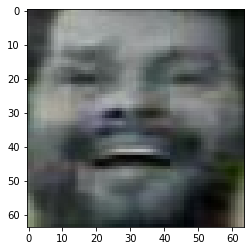

In [24]:
plt.imshow(images[0])

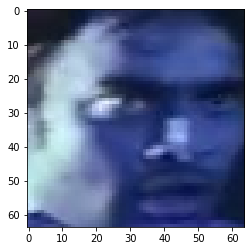

In [25]:
plt.imshow(images[1])

In [26]:
df_train.tail()

,ID,Class
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE
19905,9896.jpg,MIDDLE


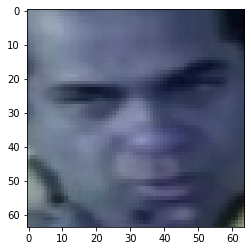

In [27]:
plt.imshow(images[-1])

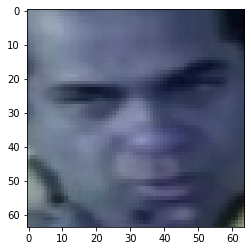

In [28]:
plt.imshow(images[19905])

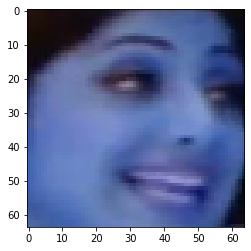

In [29]:
plt.imshow(images[19904])

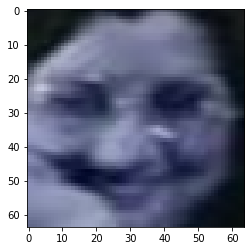

In [30]:
plt.imshow(images_test[0])

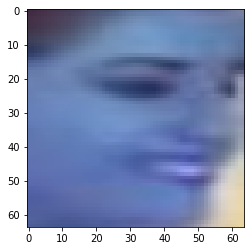

In [31]:
plt.imshow(images_test[-1])

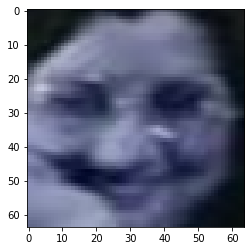

In [32]:
plt.imshow(outputs[0])

In [0]:
images = np.array(images, dtype="float") / 255.0
images_test = np.array(images_test, dtype="float") / 255.0
labels = np.array(labels)

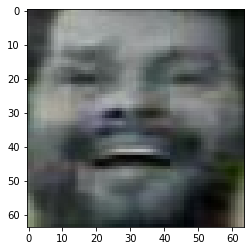

In [34]:
plt.imshow(images[0])

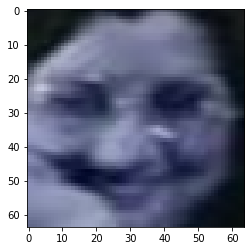

In [35]:
plt.imshow(images_test[0])

In [0]:
images[0]

In [0]:
images_test[0]

In [0]:
(trainX, testX, trainY, testY) = train_test_split(images,labels, test_size=0.30, random_state=42)

In [39]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(13934, 64, 64, 3)
<class 'numpy.ndarray'>
(13934,)
<class 'numpy.ndarray'>
(5972, 64, 64, 3)
<class 'numpy.ndarray'>
(5972,)


In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [41]:
lb.classes_

array(['MIDDLE', 'OLD', 'YOUNG'], dtype='<U6')

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = "same", activation ='relu', input_shape = (64,64,3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(3,activation="softmax"))


In [0]:
INIT_LR = 0.01 
EPOCHS = 50
BS = 32

opt=SGD(lr=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,	metrics=["accuracy"])

In [0]:
aug = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.1,horizontal_flip=True, fill_mode="nearest")

In [45]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS)

Epoch 1/50
435/435 [==============================] - 26s 59ms/step - loss: 1.1537 - accuracy: 0.5172 - val_loss: 1.0270 - val_accuracy: 0.5353
Epoch 2/50
435/435 [==============================] - 19s 43ms/step - loss: 0.8582 - accuracy: 0.6112 - val_loss: 0.7644 - val_accuracy: 0.6773
Epoch 3/50
435/435 [==============================] - 19s 43ms/step - loss: 0.8070 - accuracy: 0.6406 - val_loss: 0.7912 - val_accuracy: 0.6462
Epoch 4/50
435/435 [==============================] - 19s 43ms/step - loss: 0.7892 - accuracy: 0.6485 - val_loss: 0.7967 - val_accuracy: 0.6448
Epoch 5/50
435/435 [==============================] - 19s 43ms/step - loss: 0.7734 - accuracy: 0.6608 - val_loss: 0.7447 - val_accuracy: 0.6767
Epoch 6/50
435/435 [==============================] - 19s 43ms/step - loss: 0.7465 - accuracy: 0.6744 - val_loss: 0.7256 - val_accuracy: 0.6820
Epoch 7/50
435/435 [==============================] - 18s 42ms/step - loss: 0.7449 - accuracy: 0.6684 - val_loss: 0.6770 - val_accuracy:

In [46]:
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      MIDDLE       0.81      0.89      0.85      3239
         OLD       0.82      0.50      0.63       701
       YOUNG       0.83      0.80      0.81      2032

    accuracy                           0.81      5972
   macro avg       0.82      0.73      0.76      5972
weighted avg       0.82      0.81      0.81      5972



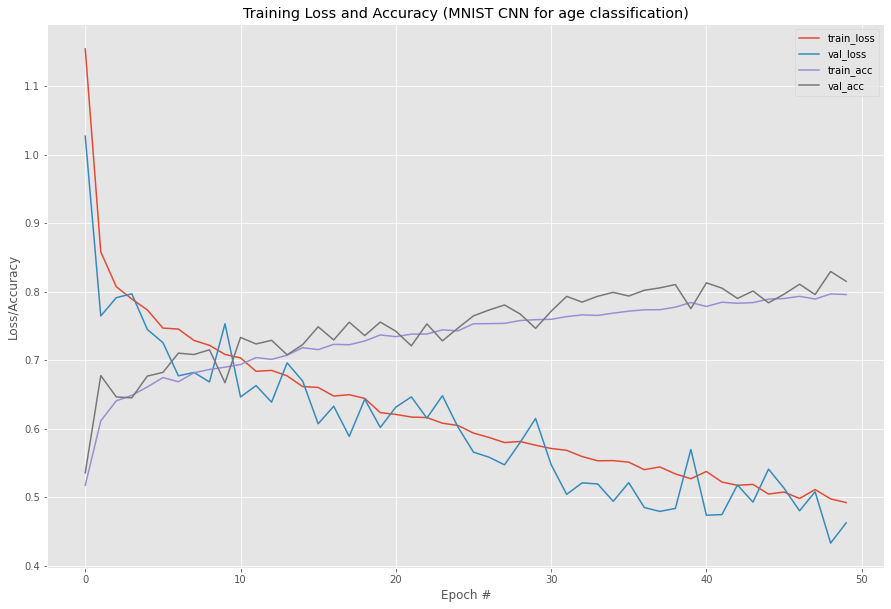

In [47]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (MNIST CNN for age classification)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [48]:
pred = model.predict(images_test)
pred

array([[7.8519750e-01, 2.5315490e-02, 1.8948708e-01],
       [2.8650664e-02, 2.6676146e-04, 9.7108251e-01],
       [5.6234455e-01, 2.4840879e-01, 1.8924668e-01],
       ...,
       [8.7768751e-01, 9.5354706e-02, 2.6957877e-02],
       [9.0835434e-01, 3.5384171e-02, 5.6261472e-02],
       [6.7656882e-02, 2.4883810e-01, 6.8350500e-01]], dtype=float32)

In [49]:
i = pred.argmax(axis=1)
i

array([0, 2, 0, ..., 0, 0, 2])

In [51]:
#Going for second test example 
i1 = pred.argmax(axis=1)[1]
i1

2

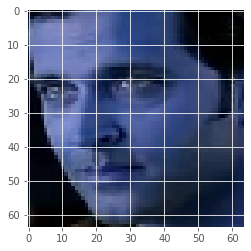

In [52]:
plt.imshow(images_test[1])

In [53]:
vals = np.amax(pred, axis=1)
vals

array([0.7851975 , 0.9710825 , 0.56234455, ..., 0.8776875 , 0.90835434,
       0.683505  ], dtype=float32)

In [54]:
#going for second test example
val1 = vals[1]
val1

0.9710825

In [55]:
#second test example
perc_val1 = val1*100
perc_val1 = perc_val1.round(2)
perc_val1

97.11

In [0]:
from google.colab.patches import cv2_imshow

In [57]:
label1 = lb.classes_[i1]
label1

'YOUNG'

In [0]:
#SEE THIS 
#need to fix this 
#output = images_test[0].copy()

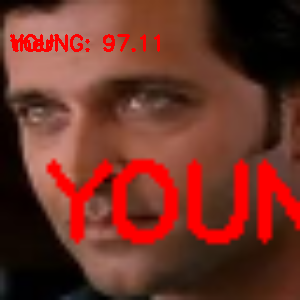

In [66]:
text = label1+": "+str(perc_val1)
#text='theri'

cv2.putText(outputs[1], text , (10,50),  cv2.FONT_HERSHEY_SIMPLEX, 0.7 ,(0, 0, 255), 2)
outputs[1] = cv2.resize(outputs[1] , (300,300))

# show the output image

cv2_imshow(outputs[1])

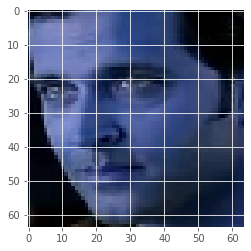

In [62]:
plt.imshow(images_test[1])